# Introduction:

The main goal of this project is to analyze biodiversity in national parks within the United States. The dataset was obtained from Codecademy, as part of a portfolio project, and will be used to explore the following:

- Summary statistics and exploratory analysis
- Distribution of conservation status by species category
- Conservation Status percentage by species category
- Conservation Status Rate vs Population Percentage

#### The following are steps that will be performed during the course of this project:

- Importing Files
- Exploring the data using graphs and summary statistics
- Cleaning data
    - Remove duplicates
    - Delete or fill in Nan
- Analysis of Conservation Data

## Importing modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns

## Loading data

The two files that will be used in this project are `observations.csv` and `species_info.csv` (both files were obtained from Codecademy)

Each file will be loaded into a dataframe and displayed intially to view the first 10 rows.

In [2]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [3]:
display(observations.head(10))
print('------------------------------------------------------------------------------------------------------')
display(species_info.head(10))

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


------------------------------------------------------------------------------------------------------


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


The observations dataframe has 3 columns, with each row being one instance of a species, which park it was seen in, and how many observations were made for that particular species.

The Species info dataframe contains information on each specific species, what the common name is, what category it is in such as mammal or fish, and whether it has a conservation status attached to it. 

### Summary Statistics and Data Exploration

In [4]:
display(observations.describe(include='all'))
print('------------------------------------------------------------------------------------------------------')
display(observations.info())

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


None

There are 5541 observations made in the dataframe, for a total of 4 different parks within the US.

In [5]:
display(species_info.describe(include='all'))
print('------------------------------------------------------------------------------------------------------')
display(species_info.info())

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


None

Out of 5824 species listed in the species_info dataframe, 191 have some kind of conservation status linked to them. The species are grouped into 7 categories.

There are no null values in the observations dataframe, while species_info only has null values for conservation_status.

Assumption is nan values for conservation status are structurally missing (i.e. animals are not in any status)

Change null values of conservation_status:

In [6]:
species_info['conservation_status'] = species_info['conservation_status'].fillna('No Status')

In [7]:
print(species_info.category.unique())
print(species_info.conservation_status.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
['No Status' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


There are 7 kinds of cateogories and 4 conservation statuses (not including 'no status')

In [8]:
print(species_info.conservation_status.value_counts(normalize=True))

No Status             0.967205
Species of Concern    0.027644
Endangered            0.002747
Threatened            0.001717
In Recovery           0.000687
Name: conservation_status, dtype: float64


Based on the species_info dataframe, about 3% of species listed have a conservation status.

In [9]:
print(species_info.duplicated().value_counts())

False    5824
dtype: int64


In [10]:
print(observations.duplicated().value_counts())

False    23281
True        15
dtype: int64


In [11]:
print(observations[observations.duplicated()])

              scientific_name                            park_name  \
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arctium minus               Yosemite National Park   
12381    Eleocharis palustris  Great Smoky Mountains National Park   
13372     Hesperis matronalis                  Bryce National Park   
16741       Prunella vulgaris  Great Smoky Mountains National Park   
17378    Potentilla norvegica               Yosemite National Park   
17577      Spilogale putorius            Yellowstone National Park   
18141           Poa compressa  Great Smoky Mountains National Park   
19392       Cichorium intybus            Yellowstone National Park   
20294  Botrychium virginianum            Yellowstone National Park   
20820    Monotropa hypopithys  Great Smoky Mountains National Park   
21151     Trifolium 

There are no duplicate rows in the species_info dataframe, but there are 15 in observations.
These duplicates might be random, since they track the same scientific name, and park name, the observations counted in each observation could be a coincidence since it is possible for an observation for the same species to occur twice.

# Analysis

## Distribution of species by conservation status

Next, a graph will be created to show how many species are in each conservation status, and they will be grouped by category.

In [12]:
distribution_constatus_category = species_info.groupby(['conservation_status','category']).count().reset_index()
display(distribution_constatus_category)

,conservation_status,category,scientific_name,common_names
0,Endangered,Amphibian,1,1
1,Endangered,Bird,4,4
2,Endangered,Fish,3,3
3,Endangered,Mammal,7,7
4,Endangered,Vascular Plant,1,1
5,In Recovery,Bird,3,3
6,In Recovery,Mammal,1,1
7,No Status,Amphibian,73,73
8,No Status,Bird,442,442
9,No Status,Fish,116,116


In [13]:
pivoted = distribution_constatus_category.pivot_table(values='scientific_name', columns='category', index='conservation_status')
display(pivoted)

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No Status,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [14]:
print(species_info.groupby(['conservation_status'])['conservation_status'].count())

conservation_status
Endangered              16
In Recovery              4
No Status             5633
Species of Concern     161
Threatened              10
Name: conservation_status, dtype: int64


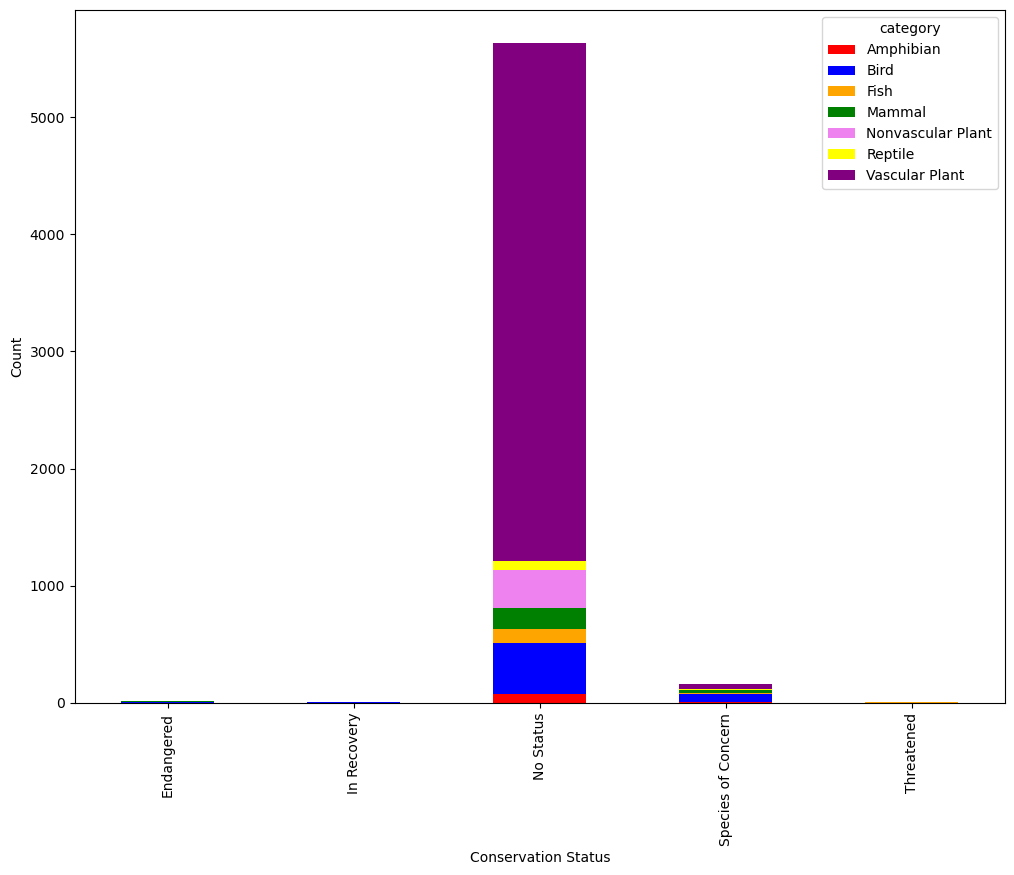

In [15]:
pivoted.plot(kind='bar', stacked=True, color=['red', 'blue', 'orange', 'green', 'violet', 'yellow', 'purple'], figsize=(12,9))
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

The graph is not very readable because of the highest occuring value being 'No Status' for the conservation status.
The numbers can be seen in the printed table above the graph, however, some modification will be done to remove the 'No Status' to better decipher the data that does have a conservation status.

In [16]:
distribution_constatus_category = species_info[species_info['conservation_status'] != 'No Status'].groupby(['conservation_status','category']).count().reset_index()
display(distribution_constatus_category)

,conservation_status,category,scientific_name,common_names
0,Endangered,Amphibian,1,1
1,Endangered,Bird,4,4
2,Endangered,Fish,3,3
3,Endangered,Mammal,7,7
4,Endangered,Vascular Plant,1,1
5,In Recovery,Bird,3,3
6,In Recovery,Mammal,1,1
7,Species of Concern,Amphibian,4,4
8,Species of Concern,Bird,72,72
9,Species of Concern,Fish,4,4


In [17]:
pivoted = distribution_constatus_category.pivot_table(values='scientific_name', columns='category', index='conservation_status')

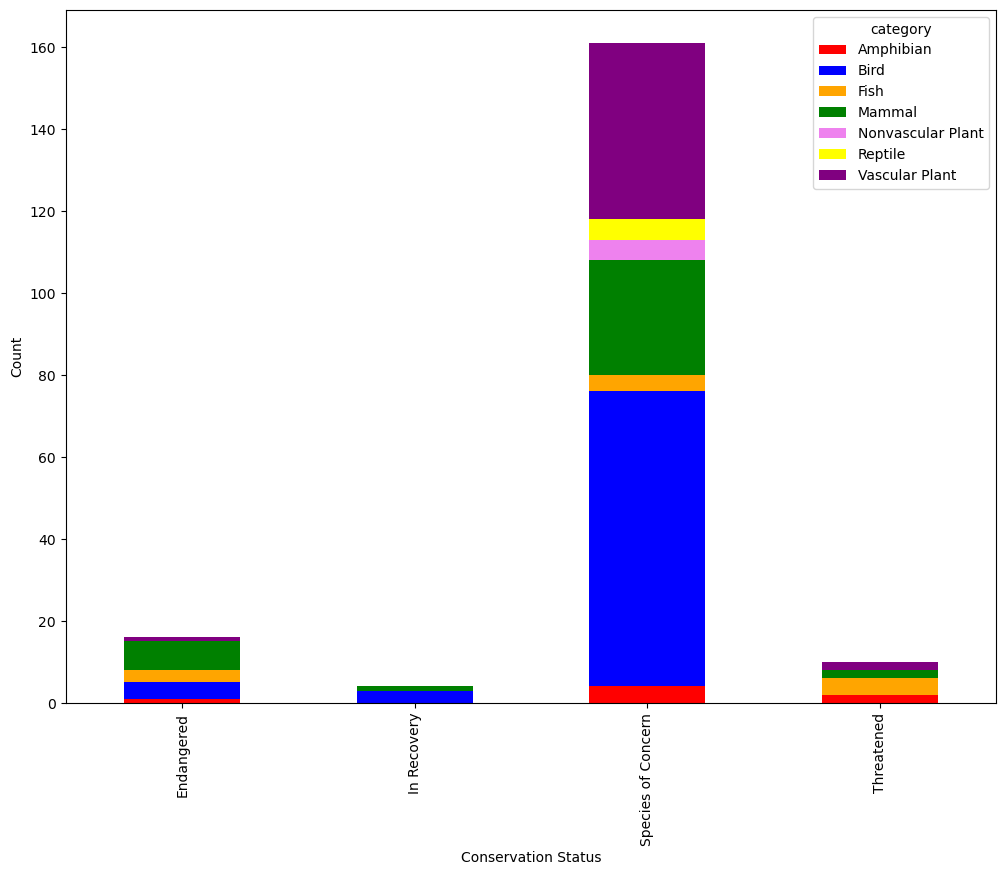

In [18]:
pivoted.plot(kind='bar', stacked=True, color=['red', 'blue', 'orange', 'green', 'violet', 'yellow', 'purple'], figsize=(12,9))
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

Based on the graph, most species are in the 'Species of Concern' category, with most of those being either a bird, vascular plant, or mammal. There are 161 species in that category, endangered has 16, with threatened  and in recovery having 10 and 4, respectively.

## Conservation Status Percentage by Category

The next section will analyze if certain groups are more prone to have a conservation status.

In [19]:
species_info['In_Conservation'] = species_info['conservation_status'] != 'No Status'

In [20]:
con_status_percentage = species_info.groupby(['category', 'In_Conservation']).count().reset_index()
display(con_status_percentage)

pivoted_con_status_percentage = con_status_percentage.pivot_table(values='scientific_name', columns='In_Conservation', index='category')

pivoted_con_status_percentage['Percent_In_Conservation'] = pivoted_con_status_percentage[True]/(pivoted_con_status_percentage[True] + pivoted_con_status_percentage[False])

display(pivoted_con_status_percentage)


,category,In_Conservation,scientific_name,common_names,conservation_status
0,Amphibian,False,73,73,73
1,Amphibian,True,7,7,7
2,Bird,False,442,442,442
3,Bird,True,79,79,79
4,Fish,False,116,116,116
5,Fish,True,11,11,11
6,Mammal,False,176,176,176
7,Mammal,True,38,38,38
8,Nonvascular Plant,False,328,328,328
9,Nonvascular Plant,True,5,5,5


In_Conservation,False,True,Percent_In_Conservation
category,,,
Amphibian,73,7,0.087500
Bird,442,79,0.151631
Fish,116,11,0.086614
Mammal,176,38,0.177570
Nonvascular Plant,328,5,0.015015
Reptile,74,5,0.063291
Vascular Plant,4424,46,0.010291


Based on the second dataframe, the categories that have the most species in a conservation status are mammals with 18% and birds with 15%. Meanwhile, vascular and non vascular plants are around 1%, which means that they are not at risk as much as mammals and birds, based on the percentages.

# Conservation Status Rate vs Population Percentage

The next portion of the analysis will look at what percentage of the total population each category has and as it relates to the percentage of the conservation status population. This will determine which categories of species are more susceptible to be protected, or at least which ones have a tendency to be protected based on the overall population percentage.

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
species_info['conservation_status'] = species_info['conservation_status'].replace('No Status', np.nan)
combined_df = pd.merge(observations, species_info)

In [23]:
display(combined_df.head(10))

,scientific_name,park_name,observations,category,common_names,conservation_status,In_Conservation
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN,False
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,NaN,False
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,NaN,False
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,NaN,False
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN,False
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,NaN,False


In [24]:
display(combined_df.describe(include='all'))
print('-----------------------------------------------------------------------------------')
display(combined_df.info())

,scientific_name,park_name,observations,category,common_names,conservation_status,In_Conservation
count,25632,25632,25632.000000,25632,25632,880,25632
unique,5541,4,NaN,7,5504,4,2
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN,Vascular Plant,Dicranum Moss,Species of Concern,False
freq,36,6408,NaN,19560,28,732,24752
mean,NaN,NaN,142.214693,NaN,NaN,NaN,NaN
std,NaN,NaN,69.912475,NaN,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,86.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,124.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,NaN,NaN,NaN


-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
 6   In_Conservation      25632 non-null  bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 1.4+ MB


None

In [25]:
combined_groupby = combined_df.groupby(['park_name', 'category']).count().reset_index()
display(combined_groupby)

,park_name,category,scientific_name,observations,common_names,conservation_status,In_Conservation
0,Bryce National Park,Amphibian,82,82,82,7,82
1,Bryce National Park,Bird,591,591,591,87,591
2,Bryce National Park,Fish,131,131,131,12,131
3,Bryce National Park,Mammal,300,300,300,58,300
4,Bryce National Park,Nonvascular Plant,333,333,333,5,333
5,Bryce National Park,Reptile,81,81,81,5,81
6,Bryce National Park,Vascular Plant,4890,4890,4890,46,4890
7,Great Smoky Mountains National Park,Amphibian,82,82,82,7,82
8,Great Smoky Mountains National Park,Bird,591,591,591,87,591
9,Great Smoky Mountains National Park,Fish,131,131,131,12,131


In [26]:
bryce = combined_groupby[combined_groupby['park_name'] == 'Bryce National Park']
display(bryce)
print(bryce.columns)

,park_name,category,scientific_name,observations,common_names,conservation_status,In_Conservation
0,Bryce National Park,Amphibian,82,82,82,7,82
1,Bryce National Park,Bird,591,591,591,87,591
2,Bryce National Park,Fish,131,131,131,12,131
3,Bryce National Park,Mammal,300,300,300,58,300
4,Bryce National Park,Nonvascular Plant,333,333,333,5,333
5,Bryce National Park,Reptile,81,81,81,5,81
6,Bryce National Park,Vascular Plant,4890,4890,4890,46,4890


Index(['park_name', 'category', 'scientific_name', 'observations',
       'common_names', 'conservation_status', 'In_Conservation'],
      dtype='object')


In [27]:
bryce = combined_groupby[combined_groupby['park_name'] == 'Bryce National Park']
display(bryce)
print(bryce.columns)

sum_pop = bryce.scientific_name.sum()
sum_con = bryce.conservation_status.sum()

bryce['percent_pop'] = round((bryce.scientific_name / sum_pop)*100, 1)
bryce['percent_by_con'] = round((bryce.conservation_status / sum_con)*100, 1)

display(bryce)


,park_name,category,scientific_name,observations,common_names,conservation_status,In_Conservation
0,Bryce National Park,Amphibian,82,82,82,7,82
1,Bryce National Park,Bird,591,591,591,87,591
2,Bryce National Park,Fish,131,131,131,12,131
3,Bryce National Park,Mammal,300,300,300,58,300
4,Bryce National Park,Nonvascular Plant,333,333,333,5,333
5,Bryce National Park,Reptile,81,81,81,5,81
6,Bryce National Park,Vascular Plant,4890,4890,4890,46,4890


Index(['park_name', 'category', 'scientific_name', 'observations',
       'common_names', 'conservation_status', 'In_Conservation'],
      dtype='object')


C:\Users\dejan\AppData\Local\Temp\ipykernel_11656\661736387.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bryce['percent_pop'] = round((bryce.scientific_name / sum_pop)*100, 1)
C:\Users\dejan\AppData\Local\Temp\ipykernel_11656\661736387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bryce['percent_by_con'] = round((bryce.conservation_status / sum_con)*100, 1)


,park_name,category,scientific_name,observations,common_names,conservation_status,In_Conservation,percent_pop,percent_by_con
0,Bryce National Park,Amphibian,82,82,82,7,82,1.3,3.2
1,Bryce National Park,Bird,591,591,591,87,591,9.2,39.5
2,Bryce National Park,Fish,131,131,131,12,131,2.0,5.5
3,Bryce National Park,Mammal,300,300,300,58,300,4.7,26.4
4,Bryce National Park,Nonvascular Plant,333,333,333,5,333,5.2,2.3
5,Bryce National Park,Reptile,81,81,81,5,81,1.3,2.3
6,Bryce National Park,Vascular Plant,4890,4890,4890,46,4890,76.3,20.9


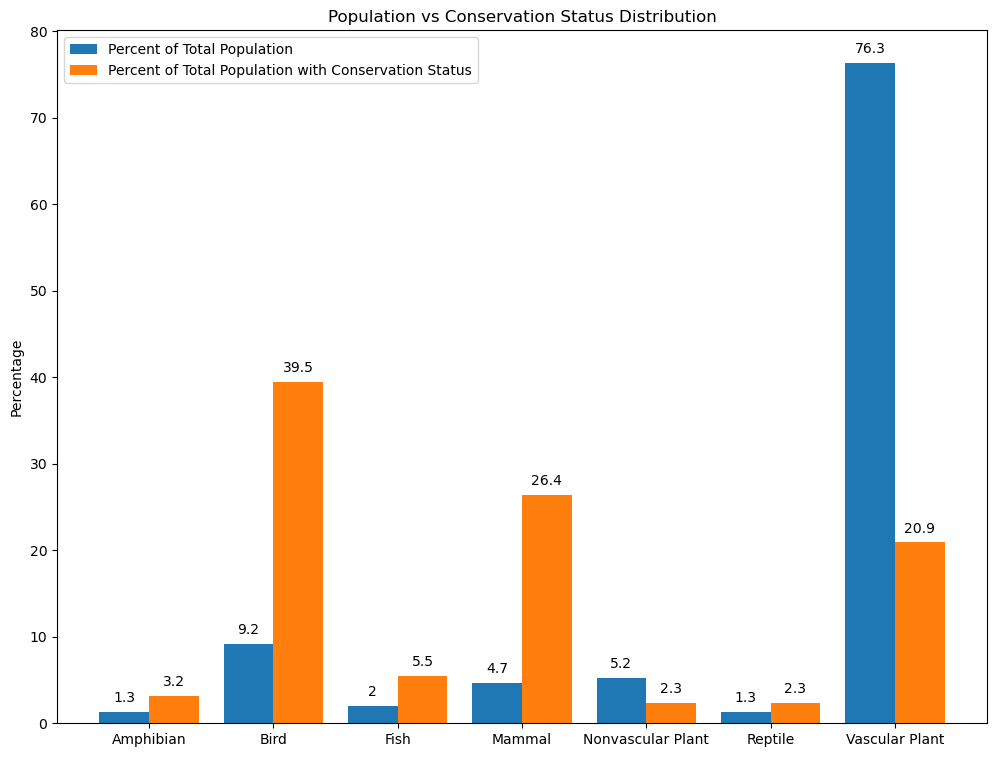

In [28]:
# Bar graph comparing percent of population vs percent of conservation status
doublebarlabels = bryce.category

x1 = np.arange(len(doublebarlabels))
width=0.4
figure = plt.figure(figsize=(12,9))
ax = plt.subplot()
totalpop = ax.bar(x1-(width/2), bryce.percent_pop, width=width, label='Percent of Total Population')
conpop = ax.bar(x1 + (width/2), bryce.percent_by_con, width=width, label='Percent of Total Population with Conservation Status')

ax.set_ylabel('Percentage')
ax.set_title('Population vs Conservation Status Distribution')
ax.set_xticks(x1, doublebarlabels)
ax.legend()

ax.bar_label(totalpop, padding=5)
ax.bar_label(conpop, padding=5)

plt.show()

The graph above shows the comparison for each species category for what percentage of the total population it accounts for vs. what percentage of the population with a conservation status. 

In other words, which species categories are more susceptible to have a conservation status as it relates to how many species they account for in the entire ecosystem.

Mammals and Birds account for a larger share of conservation status than they do for the general population, and vascular plants account for a much smaller percentage of conservation status (21%) than the general population (76%).

It seems vascular plants are not as exposed to be protected as are mammals and birds.

# Conclusion

The goals of the project were met , with exporing how the conservation status factors into the species data.
Some species are more prone to be protected, such as mammals and birds, with respect to their overall percentage of the population. However, one important point is that most species (~97%) are not in any conservation status. As far as species that are in some conservation status, most are a species of concern, but are not protected or threatened. 

Thought the analysis of this data was sufficient for this project, there are some improvements or further questions that could be answered in another review:

- Which kinds of species are most prevalent in each park?
- How does the conservation status vary between the parks?
- Is it possible to predict if a species will become endangered, or a species of concern?